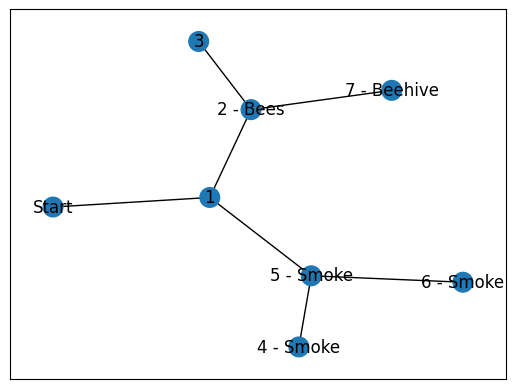

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7


bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping = {0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [2]:
# Initialize all elements of reward matrix with -1
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape = (MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# Assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
      R[point[::-1]] = 100   # set (2, 7) = 100
    else:
      R[point[::-1]] = 0


# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [3]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# Define enviromental matrices
enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action


action = sample_next_action(available_act)

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)



def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  environment = collect_environmental_data(action)
  if 'b' in environment:
    enviro_bees[current_state, action] += 1

  if 's' in environment:
    enviro_smoke[current_state, action] += 1

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

# Call the update function
update(initial_state,action,gamma)

max_value 0.0


<ipython-input-3-d01d5ed6fd92>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
<ipython-input-3-d01d5ed6fd92>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


0

In [4]:
# Training
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))   # int(Q.shape[0]) = 8
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print("-"*70)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 80.0
Score: 260.0
max_value 64.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 164.0
Score: 297.5609756097561
max_value 80.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 80.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 0.0
Score: 297.5609756097561
max_value 

<ipython-input-3-d01d5ed6fd92>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
<ipython-input-3-d01d5ed6fd92>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
<ipython-input-3-d01d5ed6fd92>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


345.0870297585626
max_value 51.2
Score: 363.05446378439075
max_value 80.0
Score: 363.05446378439075
max_value 40.96000000000001
Score: 377.4284110050533
max_value 64.0
Score: 377.4284110050533
max_value 51.2
Score: 377.4284110050533
max_value 51.2
Score: 377.4284110050533
max_value 51.2
Score: 377.4284110050533
max_value 327.9680000000001
Score: 397.44365303932085
max_value 40.96000000000001
Score: 409.9326763586691
max_value 51.2
Score: 409.9326763586691
max_value 262.3744000000001
Score: 465.54005268806714
max_value 209.89952000000008
Score: 510.02595375158546
max_value 167.91961600000008
Score: 545.6146746024002
max_value 167.91961600000008
Score: 581.203395453215
max_value 167.91961600000008
Score: 581.203395453215
max_value 209.89952000000008
Score: 625.6892965167334
max_value 327.9680000000001
Score: 638.802771002049
max_value 209.89952000000008
Score: 638.802771002049
max_value 134.33569280000006
Score: 667.2737476827008
max_value 167.91961600000008
Score: 718.4737476827008
max_

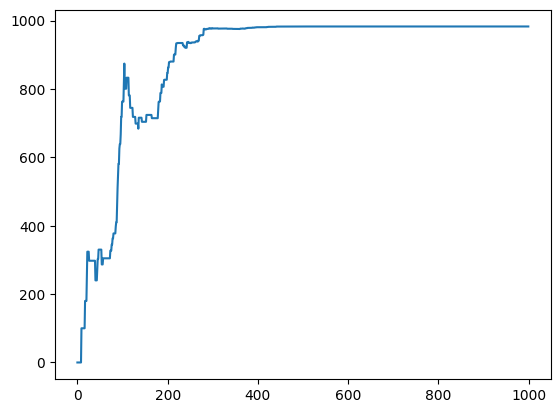

In [5]:
# Plot Q-scores
plt.plot(scores)
plt.show()

In [6]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


<ipython-input-6-24d68349ee2f>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


In [7]:
# Learning with different environment matrix
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

# Call update function
update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]

    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

max_value 0.0


<ipython-input-3-d01d5ed6fd92>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
<ipython-input-3-d01d5ed6fd92>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


In [8]:
# Training
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))   # int(Q.shape[0]) = 8
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print("-"*70)
print('Smoke Found')
print(enviro_smoke)

<ipython-input-3-d01d5ed6fd92>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act, 1))
<ipython-input-3-d01d5ed6fd92>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
<ipython-input-3-d01d5ed6fd92>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 115.2
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 115.2
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 215.2
Score: 333.8289962825279
max_

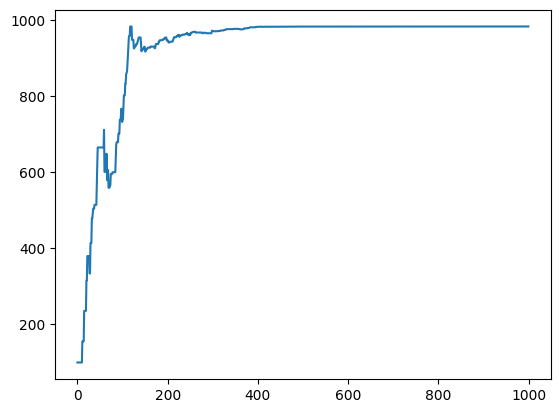

In [9]:
plt.plot(scores)
plt.show()